## John Saja - Facebook Data Lab

I will be profiling different facebook user's connection graphs using the networkX python library.
I first start by opening all files that contain edge lists for both each individual user as well as a single file that combines all users.

Then, I create graph's for all 10 users and profile their looks in chunks (to see their underlying structure better).

After, I compute basic graph statistics for the combined graph/
## Start by importing dependencies

In [1]:
import networkx as nx
from networkx import drawing as nxd
import matplotlib.pyplot as plt
from sys import argv
import math
from urllib.request import urlopen

## Next, open all files via Github so nothing needs to be downloaded or run locally

In [2]:
fComb = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/facebook_combined.txt?token=AAAM_zrZlHSwCl5C8cH8VHPgYh-A9he_ks5Y8tQywA%3D%3D')
f1 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/0.edges?token=AAAM_86OI0Wngsq6ZSukEt2QoZFtnGXYks5Y8tXMwA%3D%3D')
f2 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/107.edges?token=AAAM_5Ocp5DvzFKjSe48n5k7Yv1K3QVxks5Y8tX2wA%3D%3D')
f3 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/348.edges?token=AAAM_9a4OOWjqd0TAsl5FGvTyDmw463Nks5Y8tYOwA%3D%3D')
f4 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/414.edges?token=AAAM_6aJQUve__J8H7P8zaJ22dsZig5Kks5Y8tYmwA%3D%3D')
f5 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/686.edges?token=AAAM_31MAcgzSwfSPW-b8ZRZoBsen4-vks5Y8tY6wA%3D%3D')
f6 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/698.edges?token=AAAM_-btDZQrjfn0IlFU9xfCmqCGqGwBks5Y8tZPwA%3D%3D')
f7 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/1684.edges?token=AAAM_yt_P3Dwmr1HVvu9QBfpjN6msSBRks5Y8tZjwA%3D%3D')
f8 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/1912.edges?token=AAAM_3K_s7Wn62hM3tMPYuK2Fk3_1i3Mks5Y8tZ0wA%3D%3D')
f9 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/3437.edges?token=AAAM_6nzfKBuTVJvv5IHULJEsh7LK7pmks5Y8taLwA%3D%3D')
f10 = urlopen('https://raw.github.umn.edu/sajax003/INET4710/master/facebook/3980.edges?token=AAAM_9RvrNRyO6lR1yeSzfzdgAaTe2ZBks5Y8tadwA%3D%3D')

## Create all Graphs using networkX

In [3]:
#Create graphs for all 10 .edges files
for i in range(1,11):
	exec("G%d = nx.read_edgelist(f%d, create_using=nx.Graph(), nodetype = int)" % (i, i))

#Create graph for combined file
gCombined = nx.read_edgelist(fComb, create_using=nx.Graph(), nodetype=int)

#Create positionings for all individual graphs
pos = []
for i in range(1,11):
	exec("pos.append(nx.spring_layout(G%d))" % i)

## Profile 10 individual Graphs

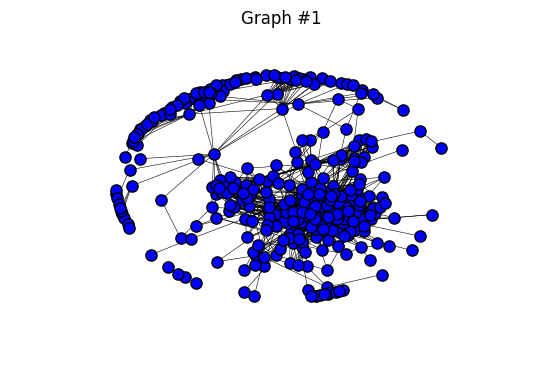

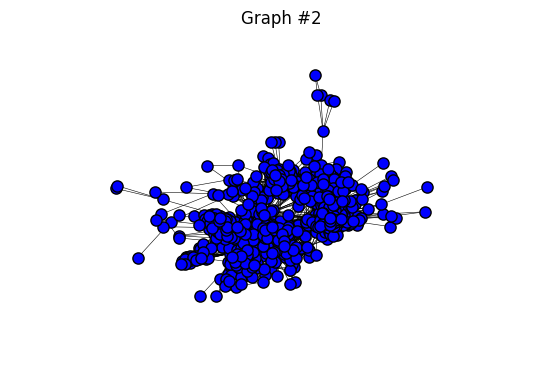

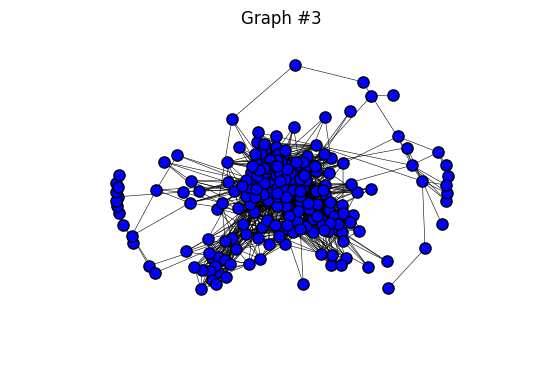

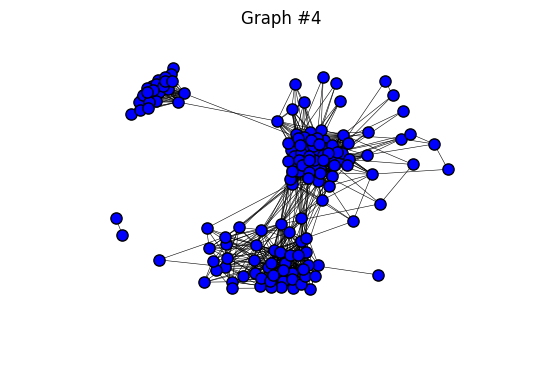

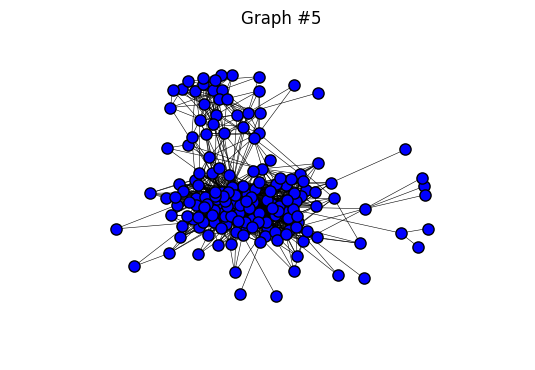

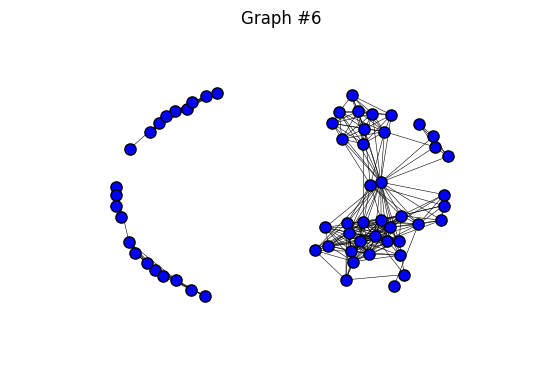

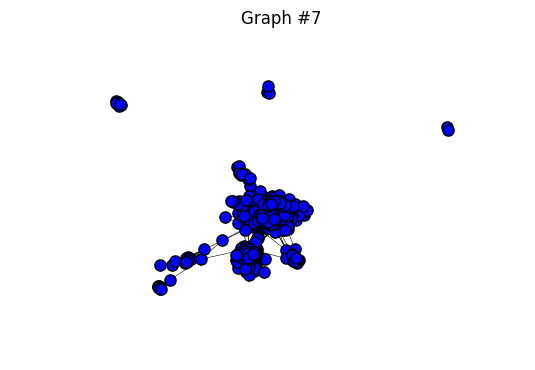

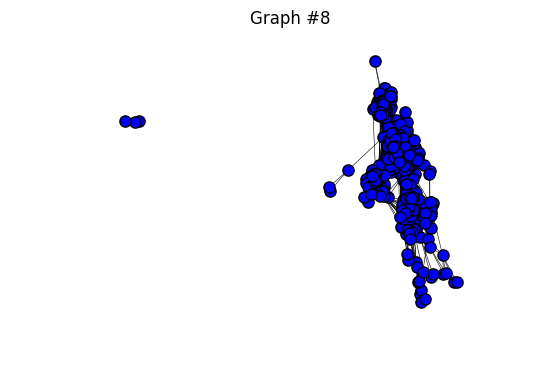

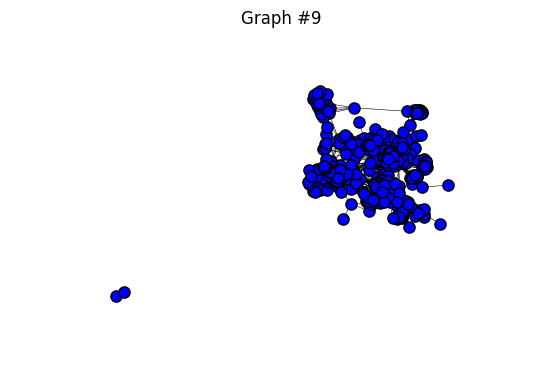

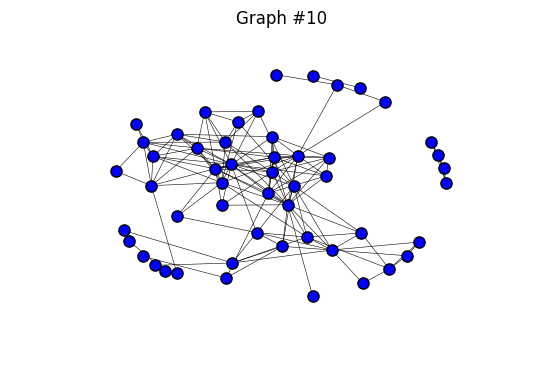

In [4]:
fig1 = plt.figure()
for i in range(1,11):
    exec("fig%d = plt.figure()" % i)
    exec("fig%d.add_subplot(111)" % i)
    exec("plt.title('Graph #%d')" % i)
    exec("nxd.draw(G%d, pos[%d], node_color='b', node_size=65, width=0.40)" % (i, (i-1)) )
plt.show()

## Compute basic Graph statistics for the combined graph

In [5]:
#Do all necessary computations
print('NUMBER OF NODES: ', len(gCombined.nodes()), "\n")
print('NUMBER OF EDGES: ', gCombined.number_of_edges(), "\n")
print('AVG CLUSTERING COEFFICIENT: ', nx.average_clustering(gCombined), "\n")
print('TRIANGLES: ', sum(nx.triangles(gCombined).values())/3, "\n")
print('DIAMETER: ', nx.diameter(gCombined), "\n")

#Degree centrality is initially expressed as a fraction: connections/Total # of nodes.
#To combat this, we simply multiply the result by the total # of nodes.
#However, this computation seems to ignore 1 node, so that is subtracted from the total # multiplied back into the fraction.
central_max = 0
central_Key = 0
for  k, v in nx.degree_centrality(gCombined).items():
	if v > central_max:
		central_max = v
		central_Key = k
print('Node of key:', central_Key, ' has the highest degree of centrality with:', int(math.ceil(central_max * len(gCombined.nodes())-1)), ' connections.')
print('Another way of stating this is that node:', central_Key, 'is connected with', central_max, 'percentage of all nodes in the graph')


NUMBER OF NODES:  4039 

NUMBER OF EDGES:  88234 

AVG CLUSTERING COEFFICIENT:  0.6055467186200871 

TRIANGLES:  1612010.0 

DIAMETER:  8 

Node of key: 107  has the highest degree of centrality with: 1045  connections.
Another way of stating this is that node: 107 is connected with 0.258791480931154 percentage of all nodes in the graph


## Close all open file connections

In [6]:
for i in range(1,11):
	exec("f%d.close()" % i)
fComb.close()
print ('successfully closed all open connections')

successfully closed all open connections
